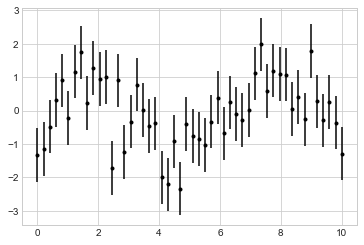

In [1]:
# 基本误差线
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')
%matplotlib inline

x = np.linspace(0, 10, 50)
dy = 0.8

y = np.sin(x) + dy * np.random.randn(50)
plt.errorbar(x, y, yerr=dy, fmt='.k')
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\Matplotlib\images\errorbar.jpg")

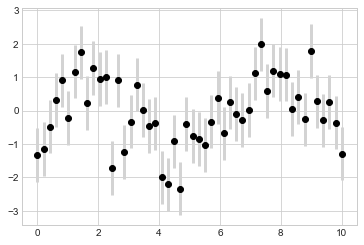

In [2]:
# 误差线
plt.errorbar(x, y, yerr=dy, fmt='o', color='black', 
             ecolor = 'lightgray', elinewidth = 3, capsize=0);
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\Matplotlib\images\errorbar1.jpg")

## 连续误差线
我们将用Scikit-Learn程序库API里面一个简单的高斯过程回归方法（GPR）来演示。这是用一种非常灵活的非参数方程对带有不确定性的连续测量值进行
拟合的方法。示例代码 如下：

In [6]:
from sklearn.gaussian_process import GaussianProcess
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# 定义模型和要画的数据
# model = lambda x:  x * np.sin(x)
# xdata = np.array([1, 3, 5, 6, 8])
# ydata = model(xdata)
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)


# 计算高斯过程拟合结果
# gp = GaussianProcess(corr = 'cubic', theta0 = 1e-2, thetaL = le-4, thetaU = 1E-1, random_start = 100)
# gp.fit(xdata[:, np.newaxis], ydata)

# xfit = np.linspace(0, 10, 1000)
# yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
# dyfit = 2 * np.sqrt(MSE)   # 2*sigma-95%置信区间
gp = GaussianProcess(corr = 'cubic', theta0=le-2, thetaL=le-4, thetaU=1E-1, random_start = 100)
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linespace(0, 10, 100)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE)      # 2*sigma~95%置信区间


ImportError: cannot import name 'GaussianProcess' from 'sklearn.gaussian_process' (D:\Anaconda3\lib\site-packages\sklearn\gaussian_process\__init__.py)

In [ ]:
# 将结果可视化
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit, color = 'gray', alpha= 0.2)
plt.xlim(0, 10);